In [1]:
#!pip install mpltools
#from mpltools import style



In [2]:
%pylab inline
style.use('ggplot') 

Populating the interactive namespace from numpy and matplotlib


# Introduction



This is a very basic introduction to some formal methods that may come up handy. It is not a complete course on how to mathematically

study evolutionary dynamics. For that, see the books cited in the last section. I also make no attempt at being mathematically precise

or rigorous. The goal is to show you that in many cases what looks like magic is simply the result of knowing how to use standard tools.



Here is the plan:

1. Demonstrate how a dynamical system is represented using differential equations.

1. Show how to study such equations by using the computer to plot their behavior.

1. Present the replicator dynamics and the replicator equation.

1. Use the replicator equation to study the dynamics of an evolutionary game.



# Dynamical Systems



(There's a [nice tutorial](http://www.gribblelab.org/compneuro2012/1_Dynamical_Systems.html) here. Some of the code below is taken from there.)



We are interested in how populations change over evolutionary time. Saying slighlty more: We are interested in how the *frequencies of different genotypes* change due to *natural selection*.

We'll say more about these idealizations later.^[This means, in particular, that we are not interested in other evolutionary "forces" such as mutation and migration. We are also not concerned at this stage in the distinction between genotypes and phenotypes (and hence development). We assume we know all we need to know about an individual by looking at its genotype.] For now I want to focus on what this means in terms of the thing we are analyzing and the type

of analyses we can perform.



What we just described -- "changes in population frequencies over time due to natural selection" -- is a _dynamical system_. 



From _The Theoretical Minimum_ (Susskind and Hrabovsky, 2013):



1. A collection of objects—particles, fields, waves, or whatever—is called a _system_. A system that is either the entire universe or is so isolated from everything else that it behaves as if nothing else exists is a _closed_ system.





    In the jargon (that comes from physics), the collection of all states possibly occupied by a system is its space of states, or, more simply, its _state-space_.



    This idea is really important. Think of a world with two species, rabbits and wolves. 

    At each point in time we can count the rabbits and the wolves. The state of the world is then (no. of rabbits, no. of wolves).

    We can think of this as a point in a two-dimensional space (a regular, XY graph). We can then describe how the world changes 

through time as a sequence of points on this graph. A line connecting the points is a trajectory of the system through time.

Of course if we have more than two _state variables_ we need more than two dimensions, and graphing the system becomes more challenging.



    To summarize: We are going to represent all the information about the state of the system at a given time as one point and see how

    this point "moves" over time. 







2. A system that changes with time is called a _dynamical system_. A dynamical system consists of more than a space of states. 

It also entails a _law of motion_, or _dynamical law_. The dynamical law is a rule that tells us the next state given the current state. 

We assume that the  dynmaical law is _deterministic_ (you should be getting a little worried at this point, if you remember that we want to study evolution).





Dynamical systems are represented as sets of differential equations. Differential equations are a complex area of mathematics, but lucky for us we don't really have

to understand the details. Most of the analysis is done numerically or by simulations. What this means in practice is that most of the time all we need to understand is what the equations mean -- how 

they represent our understanding of the system being investigated -- and how to read graphs representing

the dynamic tranjectories of systems through time. We use the computer to produce these graphs. 



What's most important, however, is the questions we ask about dynamical systems. Or, the same thing in different words: the type of questions we use dynamical systems to answer.

We will be concerned with the long term behavior of the systems we will study. In practice this means loooking for equilibria (attractors; states that once the system enters it doesn't leave), 

basins of attractions (how close to the equilbria the system needs to be, to be sucked in), or alternatively ossiclations that the system makes. We will shortly see all of these.



## Coffee Break



It's important not to get buried in the details. Our main goal is to think about evolution, not learn mathematics. So, let's pause and think for a second about this 

modeling _approach_ (it is not a specific model, or a model of specific phenomena; it is also arguably not a specific evolutionary model, in the sense of a specific model of evolutionary change -- but we'll have to get back to this question later). 

So, what does this modeling approach foreground? What does it push to the background? What is totally missing?



I am not going to list the answers here. Think about it over coffee and from time to time throughout the semester. 

# A Physics Example



Consider a simple physical system composed of a mass attached to a string. How does the system behave over time? 



To study this we recall Newton's second law (but of course): $F=ma$



What this really means is that $a=F/m$ which means that once we know the forces acting on a body and the body's mass, we can calculate its acceleration, or how its speed changes over time.



The $F$ is also a little misleading. What we need to know is the sum of all the forces acting on a body. So, one more time, say it with me:



$a=\Sigma{F}/m$



So, to study our mass and spring system we need to identify the foces acting on the mass. There are two: gravity, pulling the mass down, and the spring pulling the mass back up.

You can ignore the details, or recall the physics you learned in highschool. Bottom line is that the accelaration is going to be:



$a=(mg-kx)/m$



The $mg$ term is the effect of gravity ($g$), pulling down; $-kx$ is the effect of the spring, pulling up. $g$ is the gravitational constant on Earth. $k$ is a constsnt that desrcibes the spring's stiffness.

(Yes, the strength the spring acts on you depends on how far you stretched it already. Try it! (But be careful!))





But, you say, I promised you differential equations (and stuff!). Right, it's actually in here. Only hidden. What is $a$? Acceleration, you say.

And what, prey tell, is accelaration? It is change in speed (or velocity). In math-speak: "accelaration is the time derivative of velocity".^[You may be used to seeing this written as \frac{dv}{dt}. The noation we use is more common in physics for denoting time deriviatives.] So,



$\dot{v}=(mg-kx)/m$



------



**Reminder:**



The deriviative of a function is the local rate of change, or how much the funciton changes value around a particular point. It is formally defined like this:



$$\frac{df}{{dx}} = \mathop {\lim }\limits_{\Delta h \to 0} \frac{{f\left( {x + \Delta h} \right) - f\left( x \right)}}{\Delta h}$$



Don't worry if you haven't seen this definition before. All you need to remember is that the deriviative is the rate of change of a function.



------



But, and here you jump up and down in your chair, isn't velocity itself the change in location over time? Why, I think you are correct!





$\ddot{x}=(mg-kx)/m$



And this, my friends, is a second order differential equation (second order beacuse of the second deriviative of location, $\ddot{x}$).



So now, what the heck can we do with this?!



We can study such equations analytically (that is, manipulate them algebraically). Differential equation have a _general solution_ which specifies

what x as a the function ($x(t)$) looks like, so that it satisfies the equation. But to know the specific function we need to know the _initial conditions_.



But, what we can also do is study the equation numerically. Here goes.



We will use the computer to see how $x$ (and $\dot{x}$) change over time, by using the deriviative, which says how much the function changes each instant of time.

This mathematical operation is called _integrating_. What we need to give the computer is a nice expression specifying the deriviative. Here it is one more time:



$\ddot{x}=g-\frac{kx}{m}$



Here's how the process works. We start from some intial condition (also called _boundary condition_). In this case, the starting location and speed of the mass. 

The computer uses the deriviative to compute the next value (which is current value+change), and then uses the new value to computer a newer value

(which is new value+new change) and so on. So what we need to keep track of is the current position and the acceleration.



**Practical tip:** To simulate (solve) a differential equation we need to write a function f(x,t) that returns $\dot{x}$. 



**Practical tip II:** If we have second deriviatives like $\ddot{x}$, or higher, we simply represent the system using an extra equation $g(\dot{x},t)$ which returns $\ddot{x}$.



**Practical tip III:** When we have more than one equation, the function we need to write is f(state,t), where state is all the state variables. The function returns the deriviatives of each of the state variables. See the example below.  



__Note__



In our case we are not really interested in solving an equation at all, but remember that $F=ma$ is the same as $F-ma=0$.

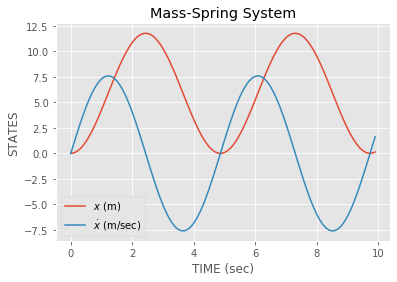

In [3]:
from scipy.integrate import odeint



def MassSpring(state,t):

  # unpack the state vector

  x = state[0]

  xd = state[1]

  

  # these are our constants

  k = 2.5 # Newtons per metre

  m = 1.5 # Kilograms

  g = 9.8 # metres per second



  # compute acceleration xdd

  xdd = ((-k*x)/m) + g

  

  # return the two state derivatives

  return [xd, xdd]



state0 = [0.0, 0.0]

t = arange(0.0, 10.0, 0.1)



state = odeint(MassSpring, state0, t)



plot(t, state)

xlabel('TIME (sec)')

ylabel('STATES')

title('Mass-Spring System')

legend(('$x$ (m)', '$\dot{x}$ (m/sec)'));

Study the graph. What are your conclusions about the motion of the mass? Will it ever stop?



Let's draw a plot of $x$ to $\dot{x}$

In [4]:
xx, yy = state.T

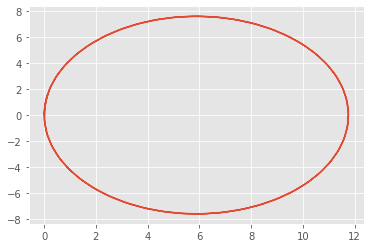

In [5]:
p=plot(xx,yy)

# Lotka-Volterra Equations



We now turn our attention to what is probably the most well-known model in mathematical biology, the _Lotka-Volterra_ equations. 

This time the dyanmical system consists of two equations, one for number of predators and one for number of prey.



The Lotka - Volterra predator prey equations were discovered independently by Alfred Lotka and by Vito Volterra in 1925-26.

Here is how Volterra got to these equations: The number of predatory fishes in the Adriatic Sea immediately after WWI was much higher than before the war (and the number of prey fish much lower). The question as to why this was so was posed to the mathematician Volterra by his prospective son-in-law Ancona who was a marine biologist. Volterra's approach was to use a very simple of model of predator-prey interactions which assume linear per capita growth rates.



See [here](http://nbviewer.ipython.org/github/pv/SciPy-CookBook/blob/master/ipython/LoktaVolterraTutorial.ipynb) for a nice tutorial. I took parts of the code below from there.



## Mathematical representation



Let $x$ be the density of the prey and $y$ the density of the predator fish. We now write down equations for how these values change over time:



$\dot{x}=x(\alpha-\beta y)$



$\dot{y}=y(-\gamma+\delta x)$



$\alpha,\beta,\gamma,\delta>0$



What this means is that the prey increase at a constant rate $a$. However, the more predators there are, the lower the rate of increase is. The effect of the predators on the increase in prey is linear in the density of the predators.



Similarly, the predator density decreases over time, by $c$, if no prey is present. The presence of prey, increases the predatory density in proportation to their density.



As before, we will not study these equations analytically. We will only solve them numerically and study the graphs.



## Modeling



1. What evolutionary forces are represented in the model?

2. What other assumptions about the biological situtations are made?

## State variables through time



The first graph we will look at is the values of $x$ and $y$ over time. We start with 0.5 denisty of each. All parameters are set to 0.1.

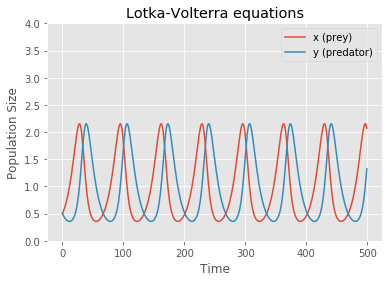

In [6]:
from scipy.integrate import odeint



def LotkaVolterra(state,t):

  x = state[0]

  y = state[1]

  alpha = 0.1

  beta =  0.1

  gamma = 0.1

  delta = 0.1

  xd = x*(alpha - beta*y)

  yd = -y*(gamma - delta*x)

  return [xd,yd]



t = arange(0,500,1)

state0 = [0.5,0.5]

state = odeint(LotkaVolterra,state0,t)

plot(t,state)

ylim([0,4])

xlabel('Time')

ylabel('Population Size')

legend(('x (prey)','y (predator)'))

title('Lotka-Volterra equations');

What conclusions can you draw from this graph?



We can also play with the parameters to explore what happens. Here is what happens when the parameters are all 0.2.

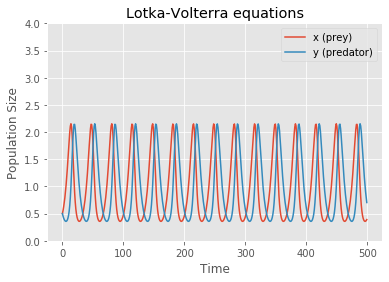

In [7]:
from scipy.integrate import odeint



def LotkaVolterra(state,t):

  x = state[0]

  y = state[1]

  alpha = 0.2

  beta =  0.2

  sigma = 0.2

  gamma = 0.2

  xd = x*(alpha - beta*y)

  yd = -y*(gamma - sigma*x)

  return [xd,yd]



t = arange(0,500,1)

state0 = [0.5,0.5]

state = odeint(LotkaVolterra,state0,t)

plot(t,state)

ylim([0,4])

xlabel('Time')

ylabel('Population Size')

legend(('x (prey)','y (predator)'))

title('Lotka-Volterra equations');

And now only $\alpha=0.2$

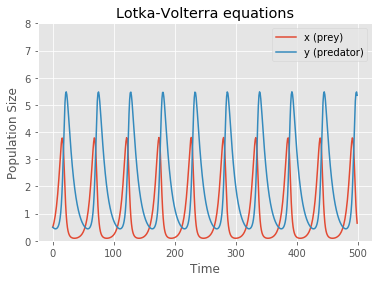

In [8]:
from scipy.integrate import odeint



def LotkaVolterra(state,t):

  x = state[0]

  y = state[1]

  alpha = 0.2

  beta =  0.1

  sigma = 0.1

  gamma = 0.1

  xd = x*(alpha - beta*y)

  yd = -y*(gamma - sigma*x)

  return [xd,yd]



t = arange(0,500,1)

state0 = [0.5,0.5]

state = odeint(LotkaVolterra,state0,t)

plot(t,state)

ylim([0,8])

xlabel('Time')

ylabel('Population Size')

legend(('x (prey)','y (predator)'))

title('Lotka-Volterra equations');

and now with $\gamma=0$.

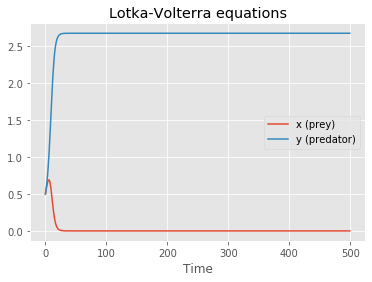

In [9]:
from scipy.integrate import odeint



def LotkaVolterra(state,t):

  x = state[0]

  y = state[1]

  alpha = 0.2

  beta =  0.2

  sigma = 0.2

  gamma = 0

  xd = x*(alpha - beta*y)

  yd = -y*(gamma - sigma*x)

  return [xd,yd]



t = arange(0,500,1)

state0 = [0.5,0.5]

state = odeint(LotkaVolterra,state0,t)

plot(t,state)

xlabel('Time')

legend(('x (prey)','y (predator)'))

title('Lotka-Volterra equations');

## Plotting the state space



We will now return to the initial parameter values, which lead to more interesting dynamics. But instead of plotting x and y over time, we will plot x,y values.

This plot shows the state-space (see above), which is also called the _phase space_ of the system (there are subtle distinctions between these terms; they are not important for us).



**Tip:** Don't think about this plot as a graph of a function! Functions can only have one $y$ value for each $x$ value, which is certainly not what happens here.

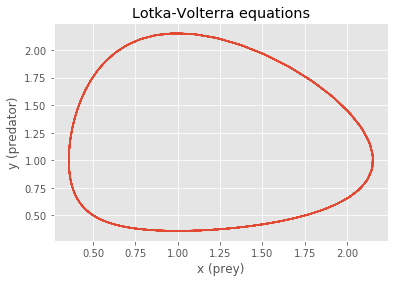

In [10]:
from scipy.integrate import odeint



def LotkaVolterra(state,t):

  x = state[0]

  y = state[1]

  alpha = 0.1

  beta =  0.1

  gamma = 0.1

  delta = 0.1

  xd = x*(alpha - beta*y)

  yd = -y*(gamma - delta*x)

  return [xd,yd]



t = arange(0,500,1)

state0 = [0.5,0.5]

state = odeint(LotkaVolterra,state0,t)

plot(state[:,0],state[:,1])

xlabel('x (prey)')

ylabel('y (predator)')

title('Lotka-Volterra equations');

This is a much nicer way of seeing what's going on. Try to draw conclusions from this graph.



This figure, however, shows only one path through the phase space. It shows what happens when you start from 0.5,0.5. Let's try ot see what

happens when we start from some other initial conditions.

In [11]:
pylab.rcParams['figure.figsize'] = (10.0, 8.0)

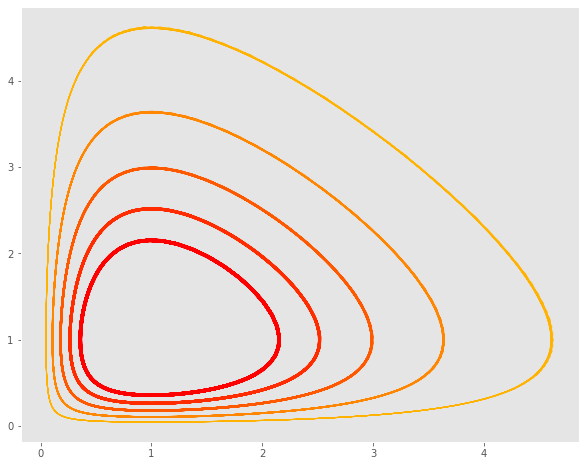

In [12]:


values  = linspace(0.3, 1, 5)                          # position of X0 between X_f0 and X_f1

vcolors = cm.autumn_r(linspace(0.3, 1., len(values)))  # colors for each trajectory



alpha = 0.1

beta =  0.1

gamma = 0.1

delta = 0.1



x0=array([0.5,0.5])



grid()



#-------------------------------------------------------

# plot trajectories

for v, col in zip(values, vcolors): 

    state0 = v*x0                     # starting point

    state = odeint(LotkaVolterra,state0,t)         

    plot( state[:,0], state[:,1], lw=3.5*v, color=col, label='X0=(%.f, %.f)' % ( state0[0], state0[1]))

    

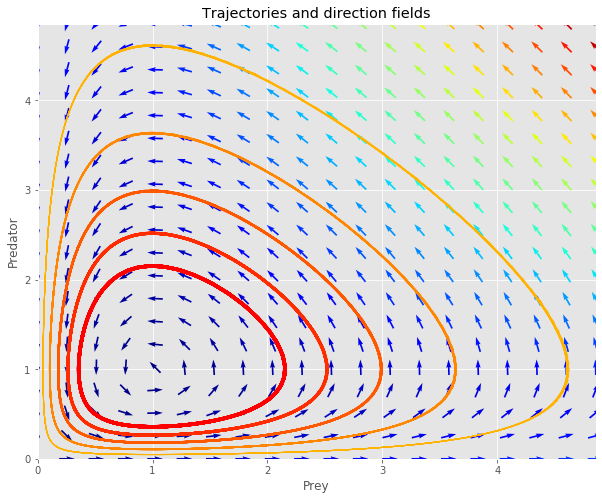

In [13]:
values  = linspace(0.3, 1, 5)                          # position of X0 between X_f0 and X_f1

vcolors = cm.autumn_r(linspace(0.3, 1., len(values)))  # colors for each trajectory



alpha = 0.1

beta =  0.1

gamma = 0.1

delta = 0.1



x0=array([0.5,0.5])



grid()



#-------------------------------------------------------

# plot trajectories

for v, col in zip(values, vcolors): 

    state0 = v*x0                     # starting point

    state = odeint(LotkaVolterra,state0,t)         

    plot( state[:,0], state[:,1], lw=3.5*v, color=col, label='X0=(%.f, %.f)' % ( state0[0], state0[1]))

    

ymax = ylim(ymin=0)[1]                        # get axis limits

xmax = xlim(xmin=0)[1] 

nb_points   = 20                      



x = linspace(0, xmax, nb_points)

y = linspace(0, ymax, nb_points)



X1 , Y1  = meshgrid(x, y)                       # create a grid

DX1, DY1 = LotkaVolterra([X1, Y1],0)        #second argument to LV is igrnoed



M = (hypot(DX1, DY1))                           # Norm of the growth rate 

M[ M == 0] = 1.                                 # Avoid zero division errors 

DX1 /= M                                        # Normalize each arrows

DY1 /= M  



title('Trajectories and direction fields')

Q = quiver(X1, Y1, DX1, DY1, M, pivot='mid', cmap=cm.jet)

xlabel('Prey')

ylabel('Predator')

grid()

xlim(0, xmax)

ylim(0, ymax);

Now tell me this isn't fun!



Note how this shows you what happens in the cycles we saw already. Looking at these arrows can tell you what happens when you intervene

in the system. Remember the original LV investigation. Increasing the amount of predators can actually lead to more prey!



See why ecology is so difficult?



## Modeling



1. The left hand side of the graph is troubling. We can get really close to zeron (for either x or y, or both). What does this mean in the real world?

1. What happens the the other species if predators (or prey) become extinct?

1. Suppose the dynamics we modeled describe a lake. There are several lakes that are isolated from each other. Winter floods the lakes and re-mixes their populations. (a) What effects do you think these changes might have? (b) How would you model this scenario?

# The Replicator Equation



The predator/prey example is a case of co-evolution. Each population affects the evolution of the other population. The only selection pressure on prey was predation.



We now want to give a more general formal treatment of evolution under natural selection.

This equation is called _the replicator equation_. The logic is simple: the frequency of a trait in a population increases proportionally with the fitness of individuals with the trait. 

Things become interesting, of course, when the fitness of a trait (or strategy, or behavior etc.) depends on the composition of the population, not only on the trait itself.

As before, we do not include mutation. What we are interested in is how the frequencies of a pre-determined set of different traits change over time.



Generalizing what we did before, we assume that the rate of increase of of trait $i$ is the differnce between the fitness of $i$ and the average fitness of the population. We also assume traits are mutually exclusive, so we have a set of trait frequencies adding up to 1.



$\frac{\dot{x_i}}{x_i}$ = fitness of $E_i$ - average fitness



which leads to _the replicator equation_:



$\dot{x_i} = x_i(f_i(\boldsymbol{x})-\bar{f}(\boldsymbol{x}))$



where



$$\bar{f}(\boldsymbol{x})=\sum_{i=1}^{n}{x_i f_i(\boldsymbol{x})}$$



## Modeling



- What assumptions about inheritance are baked into this mathematical representation?

- What happens to the population size over time?



# Enter GAMES



In many cases that we will consider the population consists of behaviors (in game theory we call them _strategies_) competing in a population. 

Fitness in this setup is determined by how well a strategy does compared to other strategies. This is determined by the _payoff matrix_. 

Each cell in the matrix $a_{ij}$ specifies how well strategy $i$ does when interacting with $j$ (i.e., what is the payoff of the player 

playing strategy $i$). We usually interpret $a_{ij}$ as the cell in row $i$ and column $j$. In this case we can write the expresison for fitness like this:



$$f_i(\boldsymbol{x})=\sum_{j=1}^{n}{a_{ij} x_j}$$

# Replicator dynamics example: Hawk-Dove game



Assume there are two strategies. Their frequencies are $x_1$ and $1-x_1$. 

So we simply look at the evolution of $x_1$, which we can denote by $x$. 



Plugging this into the replicator equation:



$\dot{x}=x (f_1(\boldsymbol{x})-\bar{f}(\boldsymbol{x}))  
= x (f_1(\boldsymbol{x})-(x f_1(\boldsymbol{x})+(1-x) f_2(\boldsymbol{x})) = 
x(1-x)(f_1(\boldsymbol{x})-f_2(\boldsymbol{x}))$



This expression gives us the replicator equation for two competeting strategies.



**Note:** $\boldsymbol{x}$ is in bold since it represents that state of the whole population (it is a vector, not one number).

In [14]:
# Here is how you can get the computer to do the algebera for you.

from sympy import *

x, xs = symbols("x xs")

f, g = symbols("f g", cls=Function)

factor("x*(f(xs)-(x*f(xs)+(1-x)*g(xs)))")

-x*(x - 1)*(f(xs) - g(xs))

Written this way it is easy to see that there are three cases in which $\dot{x}=0$. Two pure equilibria, in which the population consists of only one strategy:

In [15]:
# Show the two pure equilibria,by solving dx=0 for x

solve(-x*(x - 1)*(f(xs) - g(xs)),x)

[0, 1]

That is, when x=0 or x=1. This should be obvious: Since there are no mutations in this model, the sysem is bound to remain stable when there is a single strategy (or genotype) in the population.

$\dot{x}$ is also 0 when $f_1(\boldsymbol{x})=f_2(\boldsymbol{x})$, that is when the two strategies have the same payoff in the population. If this happens, we can have a mixed equlibrium. 

We'll now see how this happens in a famous class of games, called Hawk-Dove games. I'll explain their significance later.



In this game there are two kinds of behavior, hawkish and dove-ish behavior. When hawks face each other they fight until one of them wins. When doves meet one another they make a lot of noise, but eventually one of them retreats.

When hawks meet dove the hawk takes what it wants and the dove gets nothing, but it runs away and doesn't suffer in terms of fitness. 

We assume that the thing the animals want is worth $v$ and the cost of losing a fight is $c$. We also assume that when two hawks fight each has a 50% chance of winning.

The payoff matrix for the Hawk-Dove game is as follows.

$$\begin{pmatrix}

(v-c)/2 & v \\\

0 & v/2 

\end{pmatrix}$$



**Make sure you know how to read the matrix!**





We can use this to calculate the third equilbrium point of the replicator equation. Remember that this point represents a population mixture for which

$f_1(\boldsymbol{x})=f_2(\boldsymbol{x})$, i.e. when doves and hawks get the same average fitness. Suppose the frequency of hawks is $x$.



We can write the avergae fitness of each strategy (note how the equations match the two rows in the matrix):



$f_{hawk}=w_0 + x(v-c)/2 + (1-x)v$ where $w_0$ is a baseline fitness.



$f_{dove}=w_0 + (1-x)v/2$ 



To plug these into the replicator equation we take the difference of these two expressions, so the baseline fitness $w_0$ disapears.

In [16]:
v, c = symbols("v c")

factor("(x*(v-c)/2+(1-x)*v)-(1-x)*v/2")

-(c*x - v)/2

Now we can plug this into the replicator equation to get:



$\dot{x}=x(1-x)(f_1(\boldsymbol{x})-f_2(\boldsymbol{x}))=x(1-x)(v-cx)/2=\frac{1}{2}x(1-x)(v-cx)$



So when the frequency of hawks satisfies $v-cx=0$ the popluation will be stable. In other words, there is an equilbrium when the frequency of hawks is $v/c$.



But can you tell if the system will reach this state, if we start with different frequencies (except $x=0$ and $x=1$ of course)? Let's use the techniques we used above to invesitage!



To make things concrete, we use $v=2, c=3$. Given this choice the equation becomes:



$\dot{x}=\frac{1}{2}x(1-x)(2-3x)$



Now let's study this equation!

Populating the interactive namespace from numpy and matplotlib


C:\minconda2\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['gamma', 'Circle', 'Number', 'det', 'prod', 'multinomial', 'Line2D', 'exp', 'interactive', 'sinc', 'floor', 'conjugate', 'source', 're', 'gcd', 'log', 'array', 'cos', 'trace', 'sin', 'take', 'transpose', 'plotting', 'tan', 'sqrt', 'Polygon', 'cosh', 'pi', 'reshape', 'seterr', 'invert', 'product', 'roots', 'trunc', 'vectorize', 'plot', 'power', 'test', 'add', 'zeros', 'binomial', 'nan', 'sinh', 'ifft', 'flatten', 'eye', 'partition', 'deprecated', 'tanh', 'sign', 'beta', 'var', 'lcm', 'diff', 'diag', 'solve', 'poly', 'fft', 'mod', 'ones', 'cbrt', 'f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


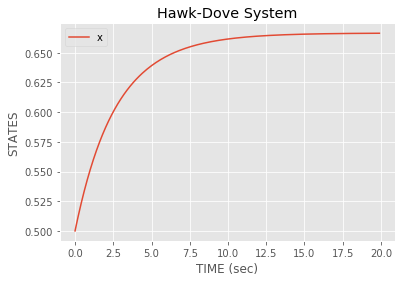

In [17]:
%pylab inline
from scipy.integrate import odeint



def HawkDove(state,t):

  # unpack the state vector

  x = state

  

  # return the the deriviative of x

  return 0.5*x*(1-x)*(2-3*x)



state0 = 0.5   # start with the population consisting of equal number of doves and hawks

t = arange(0.0, 20.0, 0.1)



state = odeint(HawkDove, state0, t)



plot(t, state)

xlabel('TIME (sec)')

ylabel('STATES')

title('Hawk-Dove System')

legend('x');

As you can see the population reaches the 2/3 equilibrium and stays there. Play with other starting points (higher and lower than 2/3)!



Let's put a few starting points on the same graph.

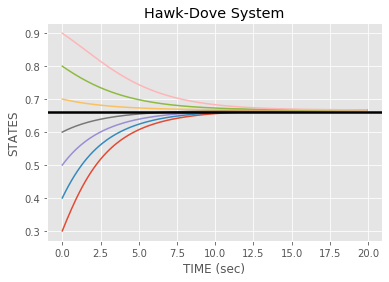

In [18]:
from scipy.integrate import odeint



def HawkDove(state,t):

  # unpack the state vector

  x = state

  

  # return the the deriviative of x

  return 0.5*x*(1-x)*(2-3*x)



t = arange(0.0, 20.0, 0.1)



start_states = arange(0.3,0.9,0.1)   # start freq. of [ 0.3  0.4  0.5  0.6  0.7  0.8  0.9]



for state0 in start_states:

    state = odeint(HawkDove, state0, t)

    plot(t, state)

    xlabel('TIME (sec)')

    ylabel('STATES')

    title('Hawk-Dove System')

    

axhline(0.66,linewidth=2.5,color='k');

    

Ain't that nice! We see that $2/3$ is an _attactor_. This can also be proven analytically. 



Another thing we can do is plot $\dot{x}$ over x (going from 0 to 1):

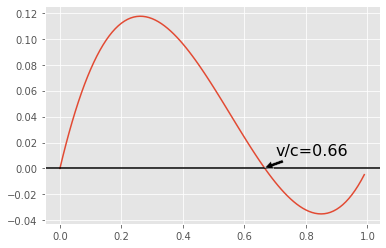

In [19]:
def HawkDove(state,t):

  # unpack the state vector

  x = state

  

  # return the the deriviative of x

  return 0.5*x*(1-x)*(2-3*x)



x = arange(0.0, 1, 0.01)



y = HawkDove(x,0)





plot(x,y)

axhline(0,color='k')





annotate('v/c=0.66', xy=(0.66, 0), xytext=(0.7, 0.01),

            arrowprops=dict(facecolor='black', arrowstyle='simple'),fontsize=16

            );

This shows that when $x$ is too low, the frequency of hawks is pushed up. When $x$ is above $v/c$, the deriviative is negative, and the frequency of hawks is pushed down.



**Question:** The graph proves that there is only one equilibrium (besides the trivial ones). Why?



$v/c$ is an equilibrium in which more than one type of individual exists in the population. We call such a situation a _polymorphic_ or _mixed_ equilibrium.



## Modeling



What does this model tell us? It shows that as $c$ gets bigger (with $c>v$) the hawkish behavior will dwindle in the population. It will be _selected against_.

This behavior, you'll recall, is fighting to the death in every encounter. Instead, dove-ish behavior, which consists of posturing but no real fighting, will prevail.



In the real world we find many cases of _conventional fights_ (or _ritualized fights_): Various elaborate signals of strength replace fights. The model (originally from John Maynard Smith) purports to show us why this happens.

The more costly fights are, the less it makes sense to escalate fights. And this is indeed what we find: highly armored speices often have conventional fights.

# Three strategies



As a final example we will consider a game with three possible strategies. Here's the payoff matrix:



$$\begin{pmatrix}

0 & 1 & -1 \\\

-1 & 0 & 1 \\\

1 & -1 & 0

\end{pmatrix}$$



Call the strategies A, B, C. Notice that A defeats B, B defeats C, and C defeats A (recall that $a_{ij}$ specifies how well strategy $i$ does when interacting with $j$). 

Do you remember a game like that?



This is, of course, **rock, sccisors, paper**.





The frequency of the types will be denoted by $x,y,z$. Let's write the fitness functions (we omit the baseline fitness since it doesn't matter). Remember that $f_i=\sum_{j=1}^{3}a_{ij}x_j$



$f_r = 0x+ 1y -1z = y-z$



$f_s = -1x + 0y + 1z = z -x$



$f_p = 1x -1y + 0z = x-y$



The average fitness is $xf_r+yf_s+zf_p$.



Ok, let's write some code.

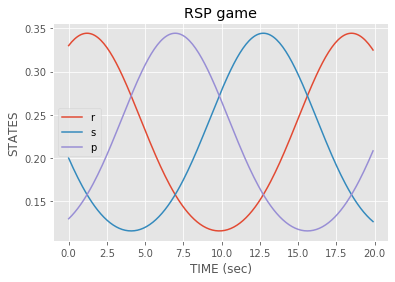

In [20]:
from scipy.integrate import odeint



def RSP(state,t):

  # unpack the state vector

  x = state[0]

  y = state[1]

  z = state[2]

  

  fr=y-z

  fs=z-x

  fp=x-y

  

  fbar=x*fr+y*fs+z*fp

  

  xd=x*(fr-fbar)

  yd=y*(fs-fbar)

  zd=z*(fp-fbar)  

  # return the the deriviative of x

  return [xd,yd,zd]



state0 = [0.33,0.2,0.13]   # sum=1 

t = arange(0.0, 20.0, 0.1)



state = odeint(RSP, state0, t)



plot(t, state)

xlabel('TIME (sec)')

ylabel('STATES')

title('RSP game')

legend(('r','s','p'));

As you can see, the system does not stablize. The population ossicilates. The only stable point (except from the three trivial cases in which only one strategy is present), is $1/3,1/3,1/3$. But it is not an attactor: 

if we start away from it the population will cycle around this central point, without converging to it.



The $1/3,1/3,1/3$ point is a Nash equlibrium.



All the points on a cycle have the same value of $xyz$. This value is call a _constant of motion_.



Let's draw some of these orbits!

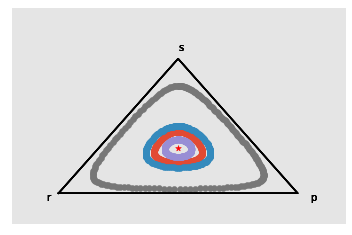

In [21]:
"""

Visualize points on the 3-simplex (eg, the parameters of a

3-dimensional multinomial distributions) as a scatter plot 

contained within a 2D triangle.



David Andrzejewski (david.andrzej@gmail.com)



From: https://gist.github.com/davidandrzej/939840

"""

import numpy as NP

import matplotlib.pyplot as P

import matplotlib.ticker as MT

import matplotlib.lines as L

import matplotlib.cm as CM

import matplotlib.colors as C

import matplotlib.patches as PA



def plotSimplex(points, fig=None, 

                vertexlabels=['1','2','3'],

                **kwargs):

    """

    Plot Nx3 points array on the 3-simplex 

    (with optionally labeled vertices) 

    

    kwargs will be passed along directly to matplotlib.pyplot.scatter    



    Returns Figure, caller must .show()

    """

    if(fig == None):        

        fig = P.figure()

    # Draw the triangle

    l1 = L.Line2D([0, 0.5, 1.0, 0], # xcoords

                  [0, NP.sqrt(3) / 2, 0, 0], # ycoords

                  color='k')

    fig.gca().add_line(l1)

    fig.gca().xaxis.set_major_locator(MT.NullLocator())

    fig.gca().yaxis.set_major_locator(MT.NullLocator())

    # Draw vertex labels

    fig.gca().text(-0.05, -0.05, vertexlabels[0])

    fig.gca().text(1.05, -0.05, vertexlabels[1])

    fig.gca().text(0.5, NP.sqrt(3) / 2 + 0.05, vertexlabels[2])

    # Project and draw the actual points

    projected = projectSimplex(points)

    P.scatter(projected[:,0], projected[:,1], **kwargs)              

    # Leave some buffer around the triangle for vertex labels

    fig.gca().set_xlim(-0.2, 1.2)

    fig.gca().set_ylim(-0.2, 1.2)



    return fig    



def projectSimplex(points):

    """ 

    Project probabilities on the 3-simplex to a 2D triangle

    

    N points are given as N x 3 array

    """

    # Convert points one at a time

    tripts = NP.zeros((points.shape[0],2))

    for idx in range(points.shape[0]):

        # Init to triangle centroid

        x = 1.0 / 2

        y = 1.0 / (2 * NP.sqrt(3))

        # Vector 1 - bisect out of lower left vertex 

        p1 = points[idx, 0]

        x = x - (1.0 / NP.sqrt(3)) * p1 * NP.cos(NP.pi / 6)

        y = y - (1.0 / NP.sqrt(3)) * p1 * NP.sin(NP.pi / 6)

        # Vector 2 - bisect out of lower right vertex  

        p2 = points[idx, 1]  

        x = x + (1.0 / NP.sqrt(3)) * p2 * NP.cos(NP.pi / 6)

        y = y - (1.0 / NP.sqrt(3)) * p2 * NP.sin(NP.pi / 6)        

        # Vector 3 - bisect out of top vertex

        p3 = points[idx, 2]

        y = y + (1.0 / NP.sqrt(3) * p3)

      

        tripts[idx,:] = (x,y)



    return tripts





# Do scatter plot



 # Define different colors for each label

cmap = CM.get_cmap('Spectral')



state0 = [0.33,0.2,0.13]   # sum=1 

state = odeint(RSP, state0, t)

fig=plotSimplex(state,cmap=cmap, norm=norm, vertexlabels=['r','p','s'])



state0 = [0.5,0.25,0.25]   # sum=1 

state = odeint(RSP, state0, t)

plotSimplex(state,cmap=cmap, norm=norm, vertexlabels=['r','p','s'],fig=fig)



state0 = [0.4,0.3,0.3]   # sum=1 

state = odeint(RSP, state0, t)

plotSimplex(state,cmap=cmap, norm=norm, vertexlabels=['r','p','s'],fig=fig)



state0 = [0.1,0.1,0.8]   # sum=1 

state = odeint(RSP, state0, t)

plotSimplex(state,cmap=cmap, norm=norm, vertexlabels=['r','p','s'],fig=fig)



# Mark 1/3,1/3,1/3

plotSimplex(array([[0.33, 0.33, 0.33]]), norm=norm, vertexlabels=['r','p','s'],marker="*",color='r',fig=fig)



P.show()

The reason that the graph is a triangle is that the sum of the frequencies of all three strategies must be 1. The set of points such that $x+y+z=1$ is called a 3-simplex.



You now know how to draw one.

# Notes



A few remarks for more advanced students. These issues will not concern us most of the time.



1. An equilbrium in the evolutionary game using the replicator equation is always a _Nash equilibrium_ of the non-evolutionary game (the game specified by the payoff matrix, sometimes called the _stage game_).

1. Nash equilbria are not always stable equilbria in the evolutionary game (recall rock-scissors-paper).

1. An _Evolutionary Stable Strategy_ (ESS) is always a Nash equilbrium (but not the converse) _and also_ a stable equilbrium inhe evolutionary game under the replicator equation.



We are not going to prove any of the these claims. You can find a formal treatment in Hofbauer and Sigmund.



A gentle introduction to Evolutionary Stable Strtegies and how to find them (without simulating the replicator dynamics explicitly) can be found in McElreath and Boyd.

# References



1. Gintis, Herbert. Game Theory Evolving: A Problem-Centered Introduction to Modeling Strategic Interaction. Princeton University Press, 2000.

1. Hofbauer, Josef, and Karl Sigmund. Evolutionary Games and Population Dynamics. Cambridge University Press, 1998.

1. McElreath, Richard, and Robert Boyd. Mathematical Models of Social Evolution: A Guide for the Perplexed. University of Chicago Press, 2008.

1. Nowak, Martin A. Evolutionary Dynamics: Exploring the Equations of Life. Harvard University Press, 2006.


